<a href="https://colab.research.google.com/github/rosalinsahoo73/rosalinsahoo73/blob/main/ML_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NITIE2022/Datasets.git
!git clone https://github.com/lucko515/clustering-python.git

Cloning into 'Datasets'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.
Cloning into 'clustering-python'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 35 (delta 0), reused 1 (delta 0), pack-reused 30
Unpacking objects: 100% (35/35), done.


 Methods to choose
    1. Classification
    2. Regression
    3. Clustering
    
Enter: 3

 Datasets to choose
      1. Mall Customer
      2. Public utilities
      
Enter: 2

\DATASET:
         Company  Fixed_charge   RoR  Cost  Load_factor  Demand_growth  Sales  \
0       Arizona           1.06   9.2   151         54.4            1.6   9077   
1        Boston           0.89  10.3   202         57.9            2.2   5088   
2       Central           1.43  15.4   113         53.0            3.4   9212   
3   Commonwealth          1.02  11.2   168         56.0            0.3   6423   
4             NY          1.49   8.8   192         51.2            1.0   3300   
5       Florida           1.32  13.5   111         60.0           -2.2  11127   
6      Hawaiian           1.22  12.2   175         67.6            2.2   7642   
7          Idaho          1.10   9.2   245         57.0            3.3  13082   
8       Kentucky          1.34  13.0   168         60.4            7.2   8406   
9 

/content/clustering-python/algorithms_custom/kmeans_numpy_improved.py:60: RuntimeWarning:

divide by zero encountered in true_divide



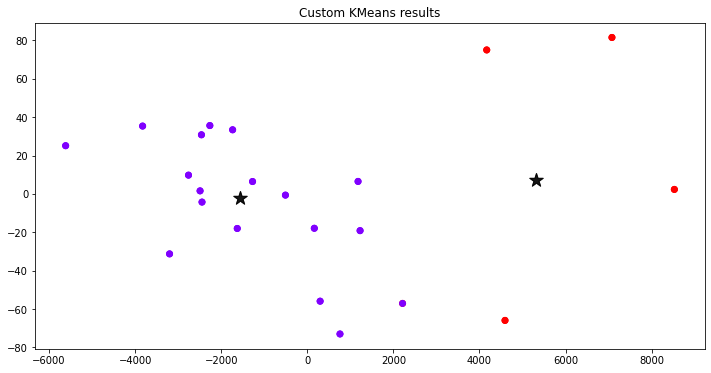


Cluster Data of  1
   Fixed_charge   RoR   Cost  Load_factor  Demand_growth    Sales  Nuclear  \
0          1.32  13.5  111.0         60.0           -2.2  11127.0     22.5   
1          1.10   9.2  245.0         57.0            3.3  13082.0      0.0   
2          0.75   7.5  173.0         51.5            6.5  17441.0      0.0   
3          1.16   9.9  252.0         56.0            9.2  15991.0      0.0   
4          1.05  12.6  150.0         56.7            2.7  10140.0      0.0   
5          1.16  11.7  104.0         54.0           -2.1  13507.0      0.0   
6          1.07   9.3  174.0         54.3            5.9  10093.0     26.6   

   Fuel_Cost  
0      1.241  
1      0.309  
2      0.768  
3      0.620  
4      1.108  
5      0.636  
6      1.306  

Centroid of cluster 1
   Fixed_charge        RoR        Cost  Load_factor  Demand_growth  \
0      1.087143  10.528571  172.714286    55.642857       3.328571   

          Sales   Nuclear  Fuel_Cost  
0  13054.428571  7.014286   0.85

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score  

from sklearn.cluster import *
from sklearn.decomposition import PCA
import random
import os
os.chdir('/content' + '/clustering-python/algorithms_custom/')
from kmeans_numpy_improved import KMeans_numpy
os.chdir('/content')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pd.set_option('display.max_columns', None)
class ML_methods():
  def __init__(self):
    # self.data_name = data_name
    # self.model_name = model_name
    np.random.seed(0)

  def start(self):
    print('====================================')
    print(""" Methods to choose
    1. Classification
    2. Regression
    3. Clustering
    """)
    choice = int(input('Enter: '))

    if choice == 1:
        self.method = 'Classification'
    elif choice == 2:
        self.method = 'Regression'
    else:
        self.method = 'Clustering'
    self.choose_dataNmodel()



  def choose_dataNmodel(self):
    if self.method == 'Classification':
      pass
    
    elif self.method == 'Regression':
      print('\n====================================')
      print(""" Datasets to choose
      1. Advertisement (Single Feature)
      2. Car Sales (Multi Feature)
      3. Steel Consumption (Time series forecasting)
      """)
      choice = int(input('Enter: '))

      if choice == 1:
          data_name = 'advertising'
      elif choice == 2:
          data_name = 'CarSales'
      else:
          data_name = 'SteelConsumption'
      self.data_name = data_name
      print('\n====================================')
      print(""" Models to choose
      1. Linear Regression
      2. Decision Tree Regressor  
      """)
      choice = int(input('Enter: '))

      if choice == 1:
          self.model = LinearRegression()
          self.model_name = 'LR'
      elif choice == 2:
          max_depth = np.clip(int(input('Enter max depth of tree (max = 15; min = 1): ')), 1, 15)
          max_leaf_nodes = np.clip(int(input('Enter max leaf nodes of tree (max = 15; min = 1): ')), 1, 15)
          self.model = DecisionTreeRegressor(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
          self.model_name = 'DTR'

      self.df = pd.read_csv(f'Datasets/{data_name}.csv')
      self.initial_df = self.df

    elif self.method == 'Clustering':
      print('\n====================================')
      print(""" Datasets to choose
      1. Mall Customer
      2. Public utilities
      """)
      choice = int(input('Enter: '))

      if choice == 1:
          data_name = 'Mall_Customers'
      elif choice == 2:
          data_name = 'MIT_clustering'
      self.df = pd.read_csv(f'Datasets/{data_name}.csv')

    print('\n====================================')
    print(f"\DATASET:\n{self.df}")
    if self.method == 'Clustering':
      self.cluster(self.df)
    else:
      self.preprocessing(self.df)

  def cluster(self,customers_data):
    k=int(input("Enter Value for K:"))
    data_types = {k.name: v for k, v in customers_data.columns.to_series().groupby(customers_data.dtypes).groups.items()}
    lst=[]
    for i in range(len(data_types["object"])):
        lst.append(data_types["object"][i])
    customers_data.drop((lst), axis=1,inplace=True)
    
    pca_reducer = PCA(n_components=2)
    reduced_data = pca_reducer.fit_transform(customers_data)
    
    kmeans=KMeans(n_clusters=k,init='k-means++').fit(reduced_data)
    cluster=(kmeans.cluster_centers_)
    print(cluster)
    full_data_kmeans = KMeans_numpy(n_clusters=k)
    centroids, clus_data = full_data_kmeans.fit(customers_data.values)
    plt.figure(figsize=(12, 6))
    for i in range(k):
        plt.scatter(reduced_data[:,0], reduced_data[:,1],
        c = KMeans(n_clusters = k).fit_predict(reduced_data),
        cmap="rainbow")
        plt.scatter(cluster[:, 0], cluster[:, 1], marker='*', color="black" ,s=200, alpha=0.7)
        plt.title("Custom KMeans results")
    plt.show()
        


    for i in range(k):
        print('\n====================================')
        print("Cluster Data of ", i+1)
        print(pd.DataFrame(clus_data[i], columns=customers_data.columns))

        print('\n====================================')
        print("Centroid of cluster", i+1)
        centroids[i]
        print(pd.DataFrame(centroids[i].reshape(1,len(customers_data.columns)), columns=customers_data.columns))
        
    
  def nominal_to_ordinal(self, df, cat, target):
    group = df.groupby([cat], as_index=False)[target].mean().sort_values(target)
    cat_list = group[cat].values
    feature_encoder = {cat_list[i]:i for i in range(len(cat_list))}
    fig = go.Figure()
    fig.add_trace(go.Bar(y = group[target], x=group[cat]))
    fig.update_xaxes(title_text=cat)
    fig.update_yaxes(title_text=target)
    df[cat] = df[cat].map(feature_encoder)
    return fig, df



  def preprocessing(self, df):
    self.target = df.columns[-1]

    # Seperated numerical and non numerical features
    data_types = {k.name: v for k, v in df.columns.to_series().groupby(df.dtypes).groups.items()}
    try:
        categorical_columns = data_types['object']
    except:
        categorical_columns = []
    cont_columns = [col for col in df.columns if col not in categorical_columns]
    print('\n====================================')
    print("DATA DESCRIPTION:\n")
    df.describe() # Shows the different stats respective to the columns in the dataset

    # Below figures shows the relation of different columns with respect to each other.
    # This helps us to find the correlation between different variables
    fig = px.scatter_matrix(df[cont_columns])
    fig.show(renderer="colab")

    # Encoding non-numerical values with respect to its mean target value, converting the variable from nominal to ordinal 
    ## Only for regression type problem
    if self.method == 'Regression':
      if len(categorical_columns):
        print('\n====================================')
        print("ENCODING:", end=' ')
        print('Encoding non-numerical values with respect to its mean target value, converting the variable from nominal to ordinal\n')
        for cat in categorical_columns:
            fig, df = self.nominal_to_ordinal(df, cat, self.target)
            fig.show(renderer="colab")

    print('\n====================================')
    print(f'\nCORRELATION:\n{df.corr()}')
    self.model_train_test(self.model, df)


  def model_train_test(self, model, df):
    self.features = [col for col in df.columns if col != self.target]

    print('\n====================================')

    if self.target == 'Consumption':
      print('Predicting the consumption of all 35 steel ids for the last month')
      X_train, y_train = df[df['months'] <= 47][self.features],df[df['months'] <= 47]['Consumption'] 
      X_test, y_test = df[df['months'] == 47][self.features],df[df['months'] == 47]['Consumption']
    else:
      print('TESTING MODEL')
      X = df[self.features]
      y = df.iloc[:, -1]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    if self.method == 'Regression':
      print(f"RMSE: {np.sqrt(mean_squared_error(predictions, y_test))}")
      print(f"MAE: {mean_absolute_error(predictions, y_test)}")
      print(f"R2: {r2_score(predictions, y_test)}")
      if self.model_name == 'DTR':
        fig = plt.figure(figsize = (50, 25))
        _=tree.plot_tree(model, feature_names = self.features, filled=True)
        plt.show()
      elif self.model_name == 'LR' and self.data_name == 'advertising':
        #y_pred = regr.predict(X_test)
        plt.scatter(X_test, y_test, color ='b')
        plt.plot(X_test, predictions, color ='k')
        plt.show()

    if self.target == 'Consumption':
      self.x_label = self.initial_df.groupby(['id'], as_index=False)['Consumption'].mean()['id']
    else:
      self.x_label = [_ for _ in range(len(y_test))]

    fig = go.Figure()
    fig.add_trace(go.Bar(y = y_test.values[:],x = self.x_label, name='Actual'))
    fig.add_trace(go.Bar(y = predictions,x = self.x_label, name='Prediction'))

    if self.target == 'Consumption':
      fig.update_xaxes(title_text='35 steel ids')
    else:
      fig.update_xaxes(title_text='test data')

    fig.update_yaxes(title_text=f'{self.target}')

    fig.update_layout(
        font=dict(
            family="bold",
            size=18,
        )
    )
    print('PREDICTION VS ACTUAL VALUES')
    fig.show(renderer='colab')
ML_methods().start()